In [3]:
import pandas as pd

#使用pandas读取元数据
data = pd.read_csv(filepath_or_buffer="./data/data.csv").to_numpy()

In [4]:

import numpy as np
from paddle.io import Dataset
import paddle
import warnings 

warnings.filterwarnings("ignore")
print(paddle.__version__)


2.3.0


In [7]:
class LinearNet(paddle.nn.Layer):
    def __init__(self):
        super().__init__()
        # 定义一个单层的输入维度为一输出维度为一的网络
        self.fc = paddle.nn.Linear(in_features=1,out_features=1)

    def forward(self,input):
        # 处理输入的一维数据
        pred = self.fc(input)
        return pred

In [6]:
class LinearDataset(Dataset):
    def __init__(self,data: np.ndarray) -> None:
        super().__init__()
        self.data = data
    
    def __getitem__(self, idx):
        # 读取每一批次中输入与输出
        # 并以np的数组的格式返回
        x = self.data[idx][0]
        y = self.data[idx][1]
        x = np.array([x],dtype="float32")
        y = np.array([y],dtype="float32")
        return x,y
       

    def __len__(self):
        return self.data.shape[0]

In [ ]:
train = LinearDataset(data=data)

In [ ]:
# step3:训练模型
model = paddle.Model(LinearNet())
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()),
              paddle.nn.MSELoss())
model.fit(train_data=train, epochs=50, batch_size=1, verbose=1)

In [ ]:
model.save("./data")

In [8]:

model = paddle.Model(LinearNet())
model.load("./model/data")

In [9]:
trial_data = np.random.random(size=(10,1)).astype(np.float32)*10
print(trial_data)
a = model.predict_batch([trial_data])

[[1.4036283]
 [9.778653 ]
 [5.571644 ]
 [8.980623 ]
 [7.8652506]
 [8.002193 ]
 [5.9656663]
 [3.5801096]
 [0.9280827]
 [2.3711264]]


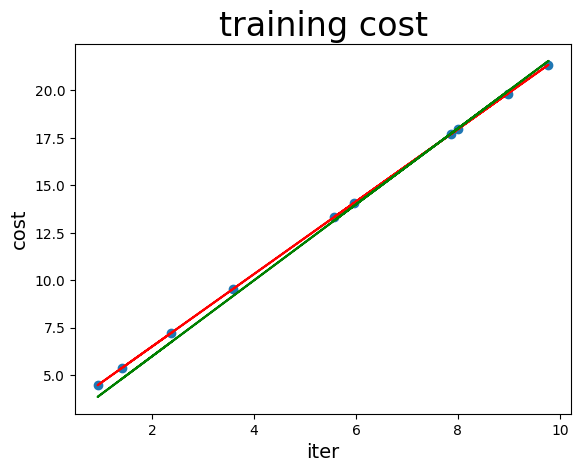

In [10]:
import matplotlib.pyplot as plt
plt.title("training cost", fontsize=24)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.scatter(trial_data,a[0])
plt.plot(trial_data, a[0], color='red')
plt.plot(trial_data,2*trial_data+2,color='green')


plt.show()